In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans

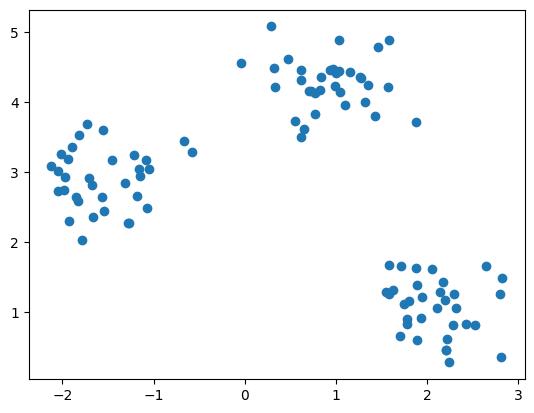

In [3]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

clustering

-30.870531280140675

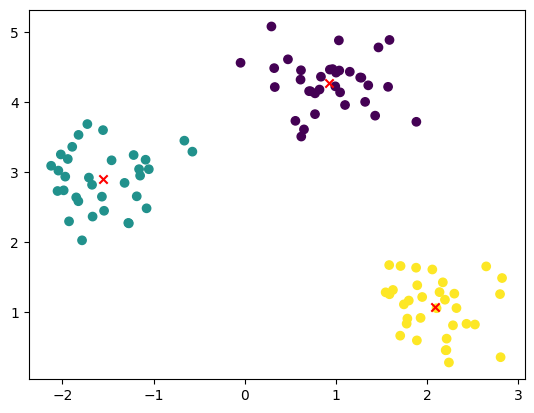

In [9]:
model =KMeans(n_clusters=3,n_init=10)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],c='r',marker='x')
model.score(X)

find the number of centers

In [10]:
iterate=[]
k_range=range(1,20)
for k in k_range:
    model =KMeans(n_clusters=k)
    model.fit(X)
    iterate.append(model.inertia_)

C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

Text(0, 0.5, 'cout du modele(inertia)')

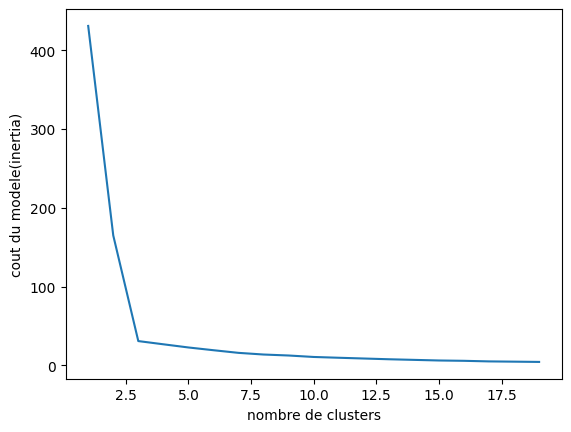

In [11]:
plt.plot(k_range,iterate)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modele(inertia)')

detection d'anomalies

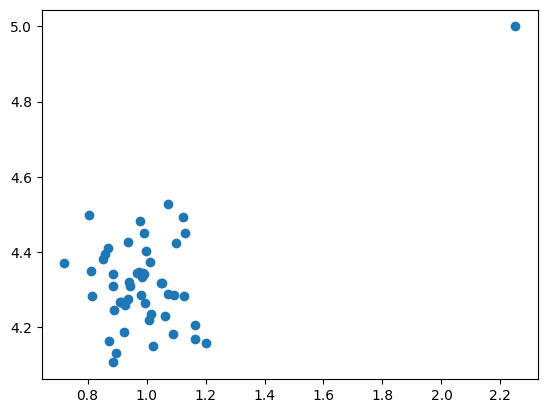

In [12]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [13]:
from sklearn.ensemble import IsolationForest

In [14]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

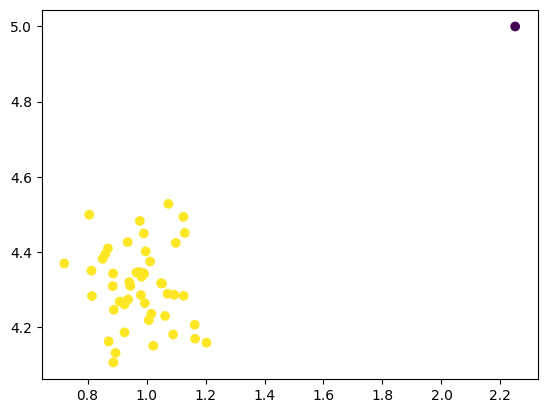

In [15]:
plt.scatter(X[:,0], X[:, 1],c=model.predict(X))

In [16]:
from sklearn.datasets import load_digits

In [17]:
digits=load_digits()
images=digits.images
X=digits.data
y=digits.target

print(X.shape)

(1797, 64)


In [21]:
mode=IsolationForest(random_state=0,contamination=0.02)
mode.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [24]:
outliers=mode.predict(X)==-1
outliers

array([False, False, False, ..., False, False, False])

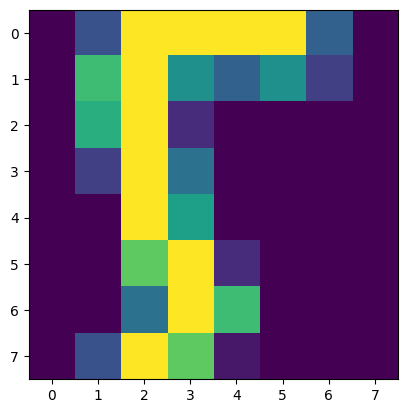

In [27]:
plt.imshow( images[outliers][2])

reduction de dimension

In [28]:
from sklearn.decomposition import PCA

In [29]:
X.shape

(1797, 64)

In [37]:
model=PCA(n_components=40)
model=PCA(n_components=0.99)
X_reduced=model.fit_transform(X)

40

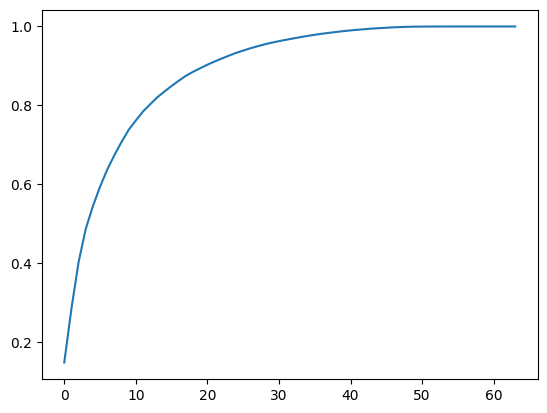

In [42]:
plt.plot(np.cumsum( model.explained_variance_ratio_))
np.argmax(np.cumsum( model.explained_variance_ratio_)>0.99)

In [ ]:
X_recovered=model.inverse_transform(X_reduced)